1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


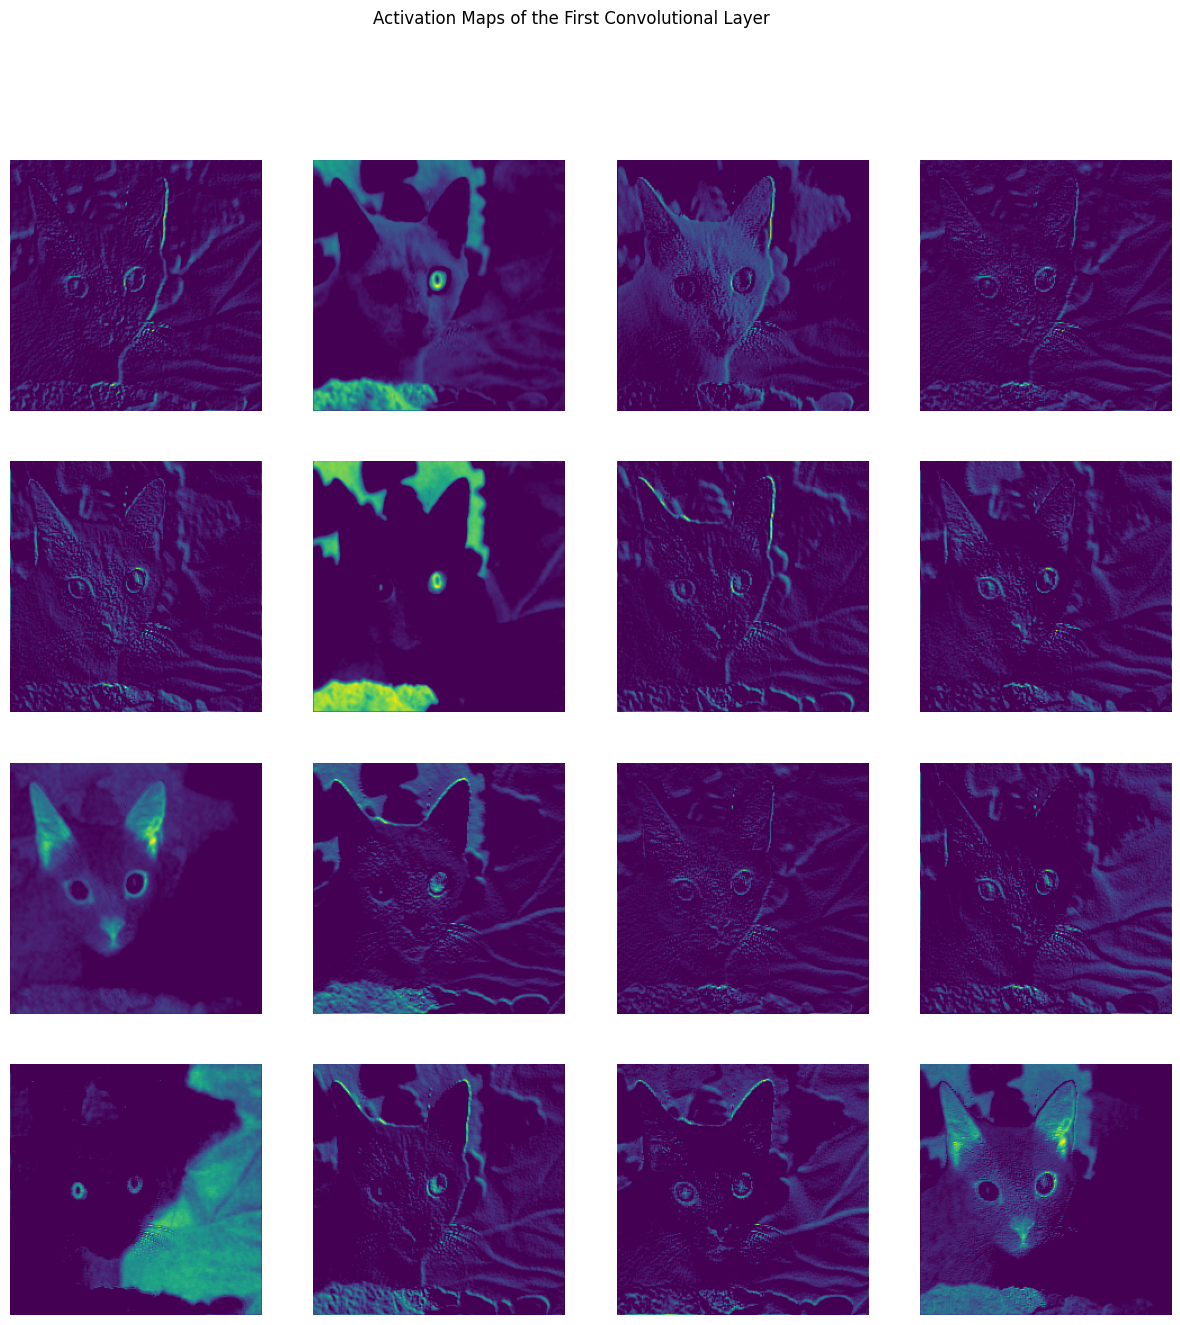

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet', include_top=True)

img_path = 'cats_vs_dogs/cats/June_odd-eyed-cat.jpg'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

first_conv_layer = model.layers[1]  
activation_model = tf.keras.models.Model(inputs=model.input, outputs=first_conv_layer.output)

activations = activation_model.predict(img_array)

num_filters = activations.shape[-1]
plt.figure(figsize=(15, 15))
for i in range(min(num_filters, 16)):  
    plt.subplot(4, 4, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Activation Maps of the First Convolutional Layer")
plt.show()

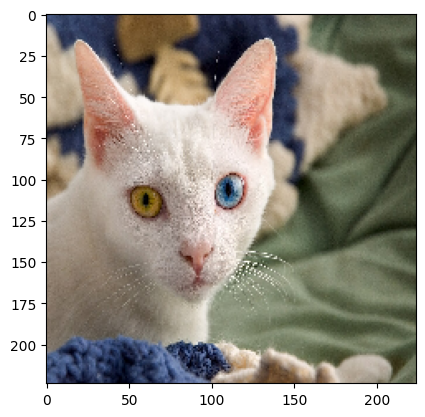

In [2]:
imgplot = plt.imshow(img)